# Imports

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy
import warnings

from common.baseclasses import AWA
from NearFieldOptics import Materials as M
from NearFieldOptics.Materials import TransferMatrixMedia as TMM
from NearFieldOptics import TipModels as T
warnings.simplefilter("ignore")

This package works best (or is at least verified to work with:
* numpy 1.16.6
* matplotlib 3.3.0
* scipy 1.2.1

# Layered structures
In this example, we will recreate the structure from Siyuan Dai's 2015 Nature paper "Graphene on hexagonal boron nitride as a tunable hyperbolic metamaterial" (https://www.nature.com/articles/nnano.2015.131).

As such, we will create a layered structure with: <br>
    ---------- Graphene ----------- <br>
    ---------- 58 nm hBN ---------- <br> 
    --------- 300 nm SiO2 --------- <br>
    ------------- Si --------------       

## Gather our materials

In [7]:
# Graphene with:
#    - Reasonable room temperature gamma = 20 1/cm
#    - Chemical potential = 370 meV = 2984.25 1/cm
Graphene = M.SingleLayerGraphene(chemical_potential=1, gamma=20)
BN = M.BN_Caldwell
Si = M.Si
SiO2 = M.SiO2_300nm

## Create a LayeredMedia object

In [8]:
Layers = [
    Graphene,
    (BN,   20e-7),
    (M.Au, 300e-7)
]
Heterostructure = M.LayeredMediaTM(*Layers, exit = Si, entrance=M.Air)

## Calculate $r_p(\omega,q)$

In [9]:
ws = np.linspace(600,1800,1200)
qs = np.linspace(1e4, 10e5, 500); q0=1/10e-7
rp = Heterostructure.reflection_p(ws,qs).T

### Comparison to data

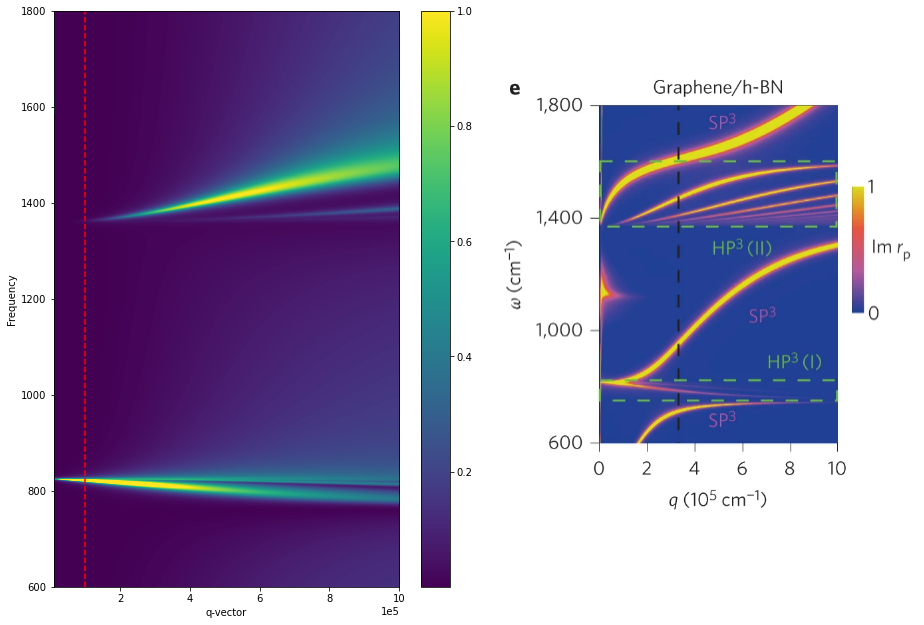

In [11]:
fig,ax = plt.subplots(figsize=(12,8),nrows=1,ncols=2)

plt.sca(ax[0])
rp.imag.plot(vmax=1)
plt.gca().ticklabel_format(axis="x", style="sci", scilimits=[5,5])
plt.axvline(q0/10,color='r',ls='--')

plt.sca(ax[1])
plt.imshow(mpimg.imread("./S_Dai_rp.png"))
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

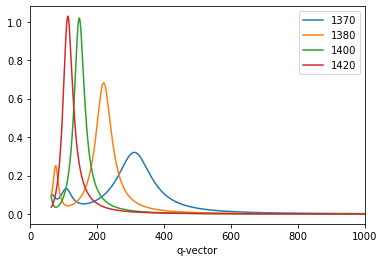

In [18]:
wns=[1370,1380,1400,1420]

for wn in wns:
    l,=rp.imag.cslice[:,wn].plot(label=wn)
    q=l.get_xdata()
    wl=2*np.pi/q*1e7
    l.set_xdata(wl)
plt.xlim(0,1000)
plt.legend()

## Calculate near-field signal

In [33]:
a=20           # Radius of tip apex for a near-field probe, in nanometers
q_a=1/(a*1e-7)        # This defines the characteristic in-plane momentum for near-fields in SNOM, in wavenumbers (cm-1)
Nqs = 244*2      # Number of q values at which to evaluate
Nzs = 12       # Number of z values at which to evaluate
A = 80         # Oscillation amplitude in nanometers
norm_at = 1000 # Frequency at which to normalize signal
norm_to=M.Au   # Material to which model will normalize signal (in this case, gold)

ws = np.linspace(600,1800,100)

S = T.LightningRodModel(ws, \
                       rp=Heterostructure.reflection_p,    \
                       a=a, Nqs=Nqs, Nzs=Nzs, amplitude=A, \
                       normalize_to=norm_to.reflection_p,  \
                       normalize_at=norm_at)

<__init__._LightningRodModel_.__call__>:
	Getting signal...
<__init__._LightningRodModel_.get_signal>:
	Computing near-field signal with Lightning Rod Model...
<__init__._LightningRodModel_.prepare_model>:
	Preparing model...
<__init__._LightningRodModel_.load_charge_data>:
	Loading charge data from file "/Users/alexandersmcleod/tools/python/NearFieldOptics/TipModels/ChargeData/HyperboloidCharge_L=6.33E+02_SkinDepth=5.00E-02_Taper=20_Quad=TS_Nzs=244_Nqs=244_freq=3.00E-03.pickle"...
	Using incident beam profile: "plane_wave"
	Incidence angle: 30 degrees
	Computing xWarp quadrature for q-values...
	PROGRESS: 0% - Computing state of the tip charge v. z & s at freq=600.0 cm^-1...
	PROGRESS: 1% - Computing state of the tip charge v. z & s at freq=612.1212121212121 cm^-1...
	PROGRESS: 2% - Computing state of the tip charge v. z & s at freq=624.2424242424242 cm^-1...
	PROGRESS: 3% - Computing state of the tip charge v. z & s at freq=636.3636363636364 cm^-1...
	PROGRESS: 4% - Computing state o

	PROGRESS: 81% - Computing state of the tip charge v. z & s at freq=1581.8181818181818 cm^-1...
	PROGRESS: 82% - Computing state of the tip charge v. z & s at freq=1593.939393939394 cm^-1...
	PROGRESS: 83% - Computing state of the tip charge v. z & s at freq=1606.060606060606 cm^-1...
	PROGRESS: 84% - Computing state of the tip charge v. z & s at freq=1618.181818181818 cm^-1...
	PROGRESS: 85% - Computing state of the tip charge v. z & s at freq=1630.3030303030303 cm^-1...
	PROGRESS: 86% - Computing state of the tip charge v. z & s at freq=1642.4242424242425 cm^-1...
	PROGRESS: 87% - Computing state of the tip charge v. z & s at freq=1654.5454545454545 cm^-1...
	PROGRESS: 88% - Computing state of the tip charge v. z & s at freq=1666.6666666666667 cm^-1...
	PROGRESS: 89% - Computing state of the tip charge v. z & s at freq=1678.7878787878788 cm^-1...
	PROGRESS: 90% - Computing state of the tip charge v. z & s at freq=1690.909090909091 cm^-1...
	PROGRESS: 91% - Computing state of the tip 

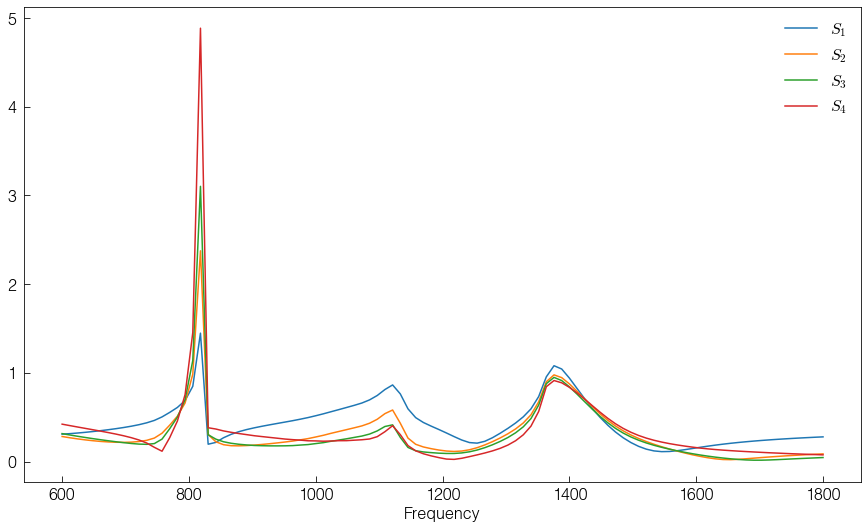

In [34]:
plt.figure(figsize=(15,8))
np.abs(S["signal_1"]).plot(label="$S_1$")
np.abs(S["signal_2"]).plot(label="$S_2$")
np.abs(S["signal_3"]).plot(label="$S_3$")
np.abs(S["signal_4"]).plot(label="$S_4$")
plt.legend();

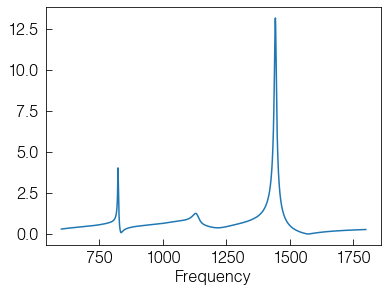

In [35]:
np.abs(rp.cslice[q_a/10,:]).plot()

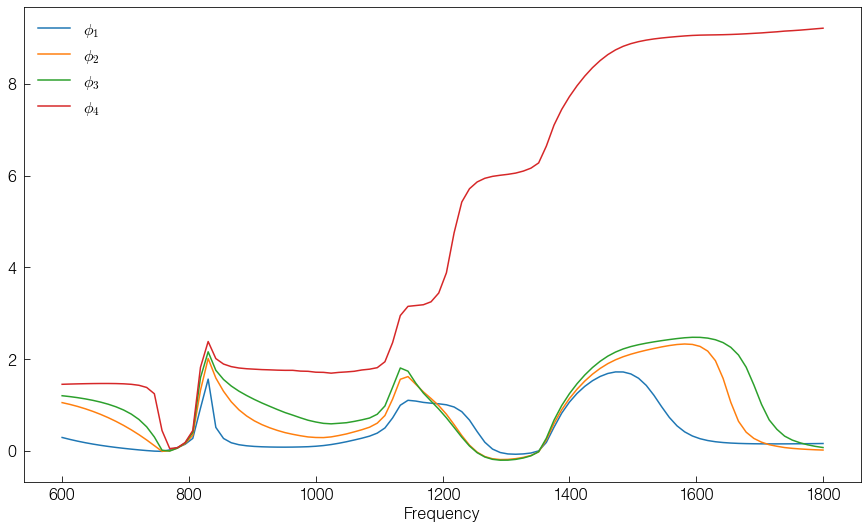

In [36]:
plt.figure(figsize=(15,8))
for n in np.arange(1,5):
    sn=S["signal_%i"%n]
    pn=AWA(np.unwrap(np.arctan2(sn.imag,sn.real)),adopt_axes_from=sn)
    pn.plot(label=r'$\phi_%i$'%n)
plt.legend();